<a href="https://colab.research.google.com/github/amansandhu408/deep-learning/blob/main/random_weight_initialization_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "ushape.csv"

# Load the latest version
df = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "saifullah57/ushape-dataset",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

100%|██████████| 7.41k/7.41k [00:00<00:00, 12.2MB/s]

First 5 records:           X         Y  class
0  0.031595  0.986988    0.0
1  2.115098 -0.046244    1.0
2  0.882490 -0.075756    0.0
3 -0.055144 -0.037332    1.0
4  0.829545 -0.539321    1.0


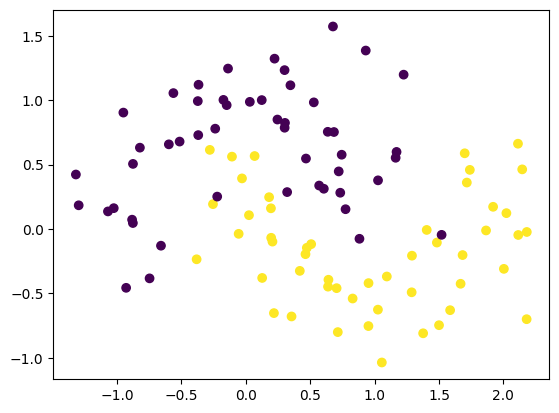

In [ ]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [ ]:
X= df.iloc[:,0:2].values
y= df.iloc[:,-1].values

In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

# Small

In [12]:
model = Sequential()

model.add(Dense(2,activation='tanh',input_dim=2))
model.add(Dense(2,activation='tanh'))
model.add(Dense(2,activation='tanh'))
model.add(Dense(2,activation='tanh'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27 (108.00 B)

 Trainable params: 27 (108.00 B)

 Non-trainable params: 0 (0.00 B)

In [13]:
initial_weights = model.get_weights()

initial_weights[0] = np.random.randn(*initial_weights[0].shape)
initial_weights[1] = np.zeros(initial_weights[1].shape)

initial_weights[2] = np.random.randn(*initial_weights[2].shape)
initial_weights[3] = np.zeros(initial_weights[3].shape)

initial_weights[4] = np.random.randn(*initial_weights[4].shape)
initial_weights[5] = np.zeros(initial_weights[5].shape)

initial_weights[6] = np.random.randn(*initial_weights[6].shape)
initial_weights[7] = np.zeros(initial_weights[7].shape)

initial_weights[8] = np.random.randn(*initial_weights[8].shape)
initial_weights[9] = np.zeros(initial_weights[9].shape)

model.set_weights(initial_weights)


In [14]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(X, y , epochs=100, validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.3523 - loss: 0.7010 - val_accuracy: 0.3500 - val_loss: 0.7000
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3727 - loss: 0.7005 - val_accuracy: 0.4000 - val_loss: 0.6984
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3477 - loss: 0.7012 - val_accuracy: 0.4500 - val_loss: 0.6968
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3695 - loss: 0.7001 - val_accuracy: 0.5000 - val_loss: 0.6954
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.4094 - loss: 0.7002 - val_accuracy: 0.5500 - val_loss: 0.6939
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3992 - loss: 0.6983 - val_accuracy: 0.5500 - val_loss: 0.6926
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.3805 - loss: 0.7000 - val_accuracy: 0.5500 - val_loss: 0.6913
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.4609 - loss: 0.6955 - val_accuracy: 0.6000 - val_loss

In [16]:
model.get_weights()

[array([[ 1.405296  , -1.373252  ],
        [ 0.39997464, -0.6511757 ]], dtype=float32),
 array([0.08432442, 0.01235357], dtype=float32),
 array([[ 0.8821367 ,  1.0995777 ],
        [-0.95644414,  0.33260337]], dtype=float32),
 array([ 0.07572041, -0.00431974], dtype=float32),
 array([[ 0.06478824, -1.2633371 ],
        [-0.45108232, -1.0206947 ]], dtype=float32),
 array([ 0.04776331, -0.03944794], dtype=float32),
 array([[-1.0572654 ,  0.02155924],
        [-0.6183047 , -1.1002984 ]], dtype=float32),
 array([-0.04856867, -0.00105392], dtype=float32),
 array([[ 0.8376874 ],
        [-0.17108466]], dtype=float32),
 array([-0.08378179], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


<Axes: >

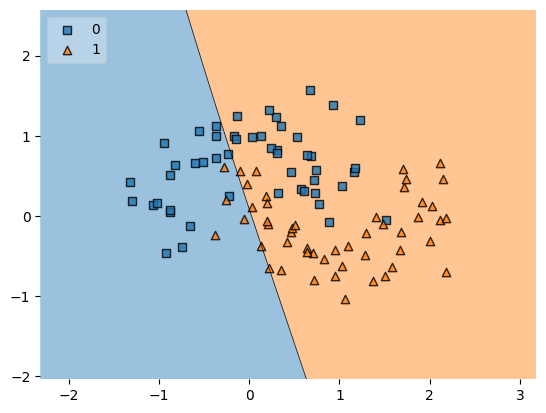

In [15]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'),clf=model, legend=2)